# linear regression

(only one degree of theta)

In [177]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

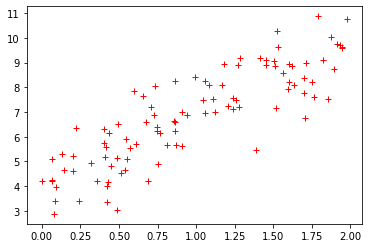

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,y,'r+')

In [179]:
from sklearn.linear_model import LinearRegression
import numpy as np

lin_reg =LinearRegression()
lin_reg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
theta0,theta1=lin_reg.intercept_,lin_reg.coef_ # theta0 ,Theta1
print(theta0,theta1)

[4.07357657] [[2.86419177]]


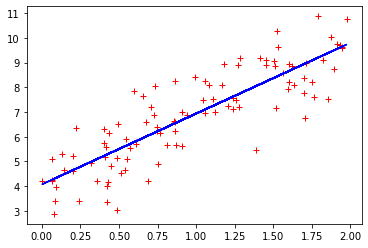

In [181]:

plt.plot(X,y,'r+')
plt.plot(X,theta0+theta1*X,'b-')

In [182]:
#Theta =[X.T*X]-1 *X.T*y
X_new =X.copy()
X_new=np.insert(X_new,0,1,axis=1)
#Theta =np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y)
Theta =np.linalg.pinv(X_new).dot(y)

In [183]:
Theta

array([[4.07357657],
       [2.86419177]])

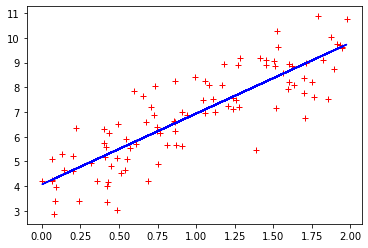

In [184]:
# using normalization equation
plt.plot(X,y,'r+')
plt.plot(X,Theta[0]+Theta[1]*X,'b-')

In [185]:
#gradient descent algo
alpha =0.1
m=100
Theta_new =np.random.randn(2,1)
iter =1000
J=[]
for i in range(iter):
  error =np.dot(X_new,Theta_new) -y
  newX=np.dot(error.T,X)
  Theta_new = Theta_new -(alpha/m)*newX.T
  J.append(np.sum((np.dot(X_new,Theta_new)-y)**2))
  # store cost func after every step
print(Theta_new)



[[4.00948674]
 [2.91303634]]


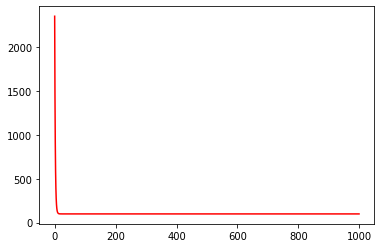

In [186]:
plt.plot(range(iter),J,'r-')
# alpha vs iter graph

In [187]:
#stochastic Gradient Descent
n_epochs =50
t0,t1=5,50
alpha = 0.1
Theta_sto =np.random.randn(2,1)

def learning_schedule(t):
  return t0/(t+t1)

J_sto=[]

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_new[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = np.dot((xi.dot(Theta_sto) - yi),xi)
    alpha = learning_schedule(epoch*m+i)
    Theta_sto = Theta_sto - alpha * gradients.T
    #cost function
    J_sto.append(np.sum((np.dot(xi,Theta_sto)-yi)**2))
print(Theta_sto)

[[4.02403794]
 [2.9113362 ]]


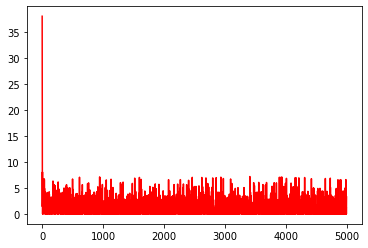

In [188]:
plt.plot(range(n_epochs*m),J_sto,'r-')
plt.show()

In [200]:
from sklearn.linear_model import SGDRegressor
sgd_reg =SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [201]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.09460211]), array([2.89994565]))

# polynomial regression

(larger degrees of theta
)

In [202]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

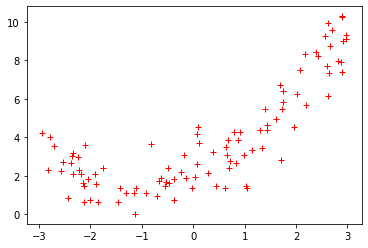

In [203]:
plt.plot(X,y,'r+')
plt.show()

[2.08401662] [[1.04184656 0.48741434]]


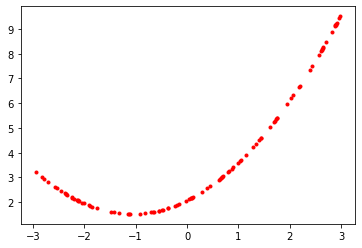

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#degree 2 fit
poly_features =PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

theta0 ,theta_poly =lin_reg.intercept_,lin_reg.coef_
print(theta0,theta_poly)
y_poly =np.dot(X_poly,theta_poly.T)+theta0
plt.plot(X,y_poly,'r.')
plt.show()

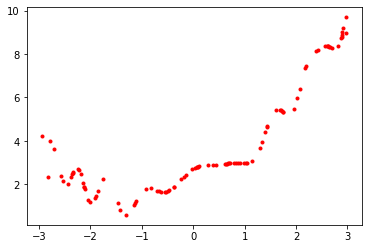

In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#degree 30 overfit
poly_features =PolynomialFeatures(degree=30,include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

theta0 ,theta_poly =lin_reg.intercept_,lin_reg.coef_

y_poly =np.dot(X_poly,theta_poly.T)+theta0
plt.plot(X,y_poly,'r.')
plt.show()

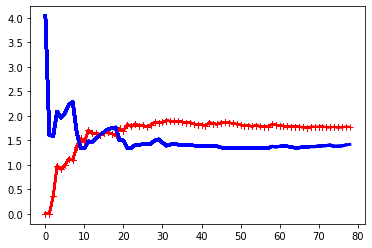

In [298]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# High variance

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

plot_learning_curves(LinearRegression(),X,y)

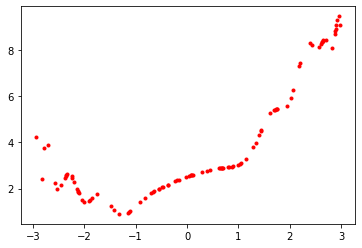

In [314]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
#degree 30 overfit
poly_features =PolynomialFeatures(degree=30,include_bias=False)
X_poly = poly_features.fit_transform(X)
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X_poly, y)
theta0,theta_poly = ridge_reg.intercept_,ridge_reg.coef_

y_poly =np.dot(X_poly,theta_poly.T)+theta0
plt.plot(X,y_poly,'r.')
plt.show()

In [390]:
m=50
n=4
X =np.random.randn(m,4)
y=X.sum(axis=1)
y=(y**2).T


In [399]:
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)
print(lin_reg.predict(np.array([[1,2,3,4]])))


3.145622232209367 [ 0.89371348  1.74868117  0.83004669 -0.05560022]
[9.80443726]


In [392]:
X_n=X.copy()
X_n=np.insert(X-n,0,1,axis=1)
theta =np.linalg.pinv(X_n).dot(y)
theta

array([16.81298674,  0.89371348,  1.74868117,  0.83004669, -0.05560022])

In [418]:
from sklearn.preprocessing import PolynomialFeatures
poly_features =PolynomialFeatures(degree = 2,include_bias=False)
X_poly=poly_features.fit_transform(X)
lin_reg =LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)

8.881784197001252e-16 [-2.33247796e-15 -2.83106871e-15 -2.39391840e-15 -8.46545056e-16
  1.00000000e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
  1.00000000e+00  2.00000000e+00  2.00000000e+00  1.00000000e+00
  2.00000000e+00  1.00000000e+00]


In [419]:
predict_y=PolynomialFeatures(degree=2,include_bias=False).fit_transform(np.array([[3,1,1,2]]))
lin_reg.predict(predict_y)

array([49.])

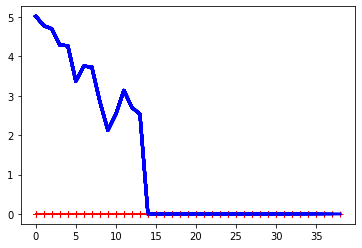

In [420]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# graph ( cross-validation vs training ) learning curves

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

plot_learning_curves(LinearRegression(),X_poly,y)